In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [96]:
#read dataset
df = pd.read_csv(r'C:\Users\DELL\Desktop\cleaned_train_data.csv')
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'rating', 'rating_count', 'about_product'],
      dtype='object')

In [98]:
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'rating', 'rating_count', 'about_product'],
      dtype='object')


In [100]:
print(df.head())


   product_id                                       product_name  \
0           0  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1           1  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
2           2  Duracell Plus AAA Rechargeable Batteries (750 ...   
3           3  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   
4           4  Logitech M235 Wireless Mouse, 1000 DPI Optical...   

                                            category  discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             507.0   
1  Computers&Accessories|NetworkingDevices|Networ...             749.0   
2  Electronics|GeneralPurposeBatteries&BatteryCha...             399.0   
3  Computers&Accessories|Accessories&Peripherals|...             279.0   
4  Computers&Accessories|Accessories&Peripherals|...             699.0   

   actual_price  rating  rating_count  \
0        1208.0     4.1        8131.0   
1        1339.0     4.2      179692.0   
2         499.0     4.3

In [112]:
# Basic statistics
num_items = df['product_id'].nunique()
num_ratings = df['rating_count'].nunique()
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique items: 1351
Number of unique ratings: 1134


In [104]:
print(df.dtypes)


product_id            int64
product_name         object
category             object
discounted_price    float64
actual_price        float64
rating              float64
rating_count        float64
about_product        object
dtype: object


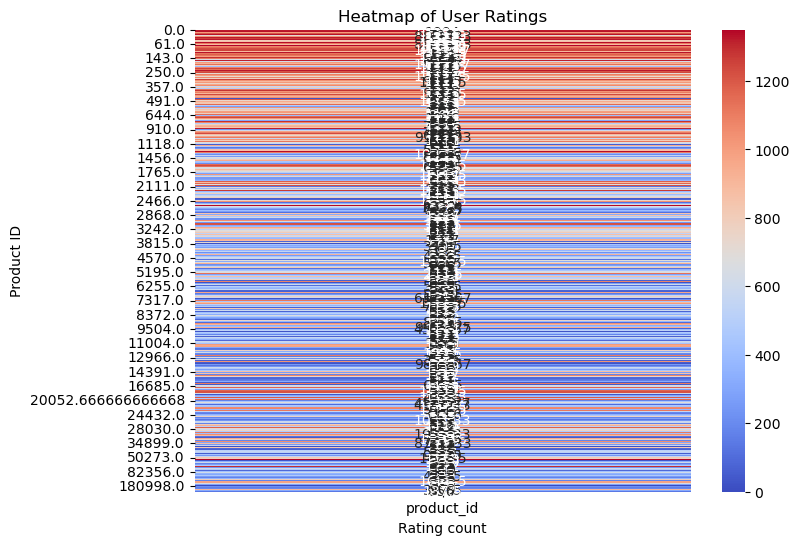

In [114]:
# Pivot the DataFrame to create a heatmap
heatmap_data = df.pivot_table('product_id', 'rating_count')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Rating count')
plt.ylabel('Product ID')
plt.show()

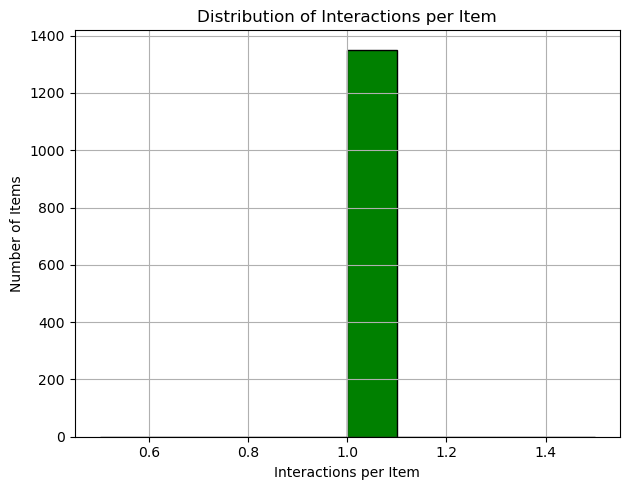

In [118]:
# Distribution of interactions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
df['product_id'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

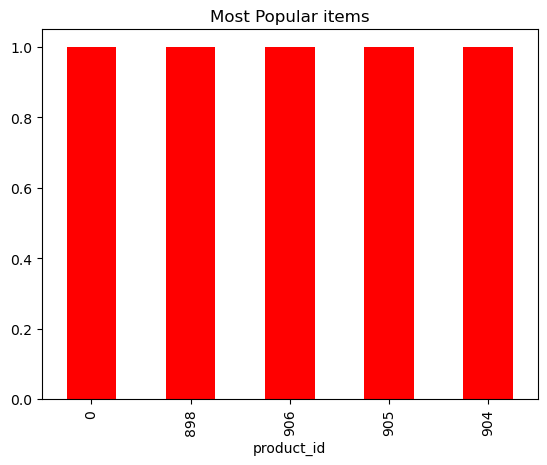

In [120]:
# Most popular items
popular_items = df['product_id'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='rating_count'>

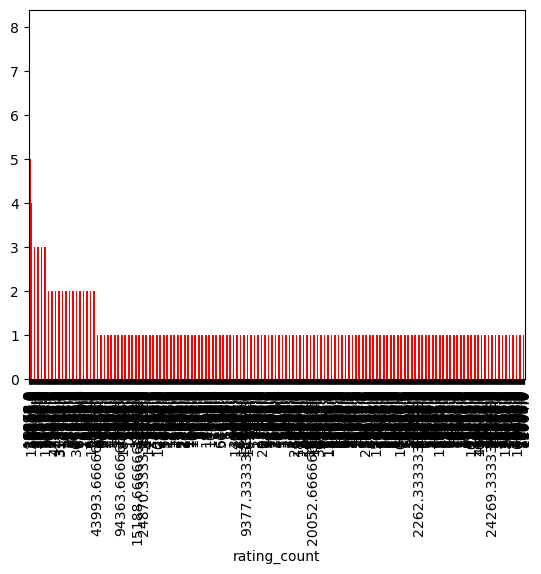

In [136]:
# most rated counts
df['rating_count'].value_counts().plot(kind='bar',color='red')